### Tutorial for using DPG_Set to develop data-driven uncertainty set

In [1]:
from dpg_set import *

### Load training data set as a $n\times m$ numpy array ($n$: the number of data samples, $m$: the dimension of a data sample)

In [2]:
#### In this example, the data set generated by 4 Gaussian distributions is used. the size of the training data set is 2000*2
rng = np.random.default_rng(1234)
mean_list = [np.array([-3,-3]), np.array([-2,3]), np.array([3.5,3]), np.array([2.5,-2.5]), np.array([-1,1])]
var_list = [np.array([[3,1.5],[1.5,2]]), np.array([[2,-1],[-1,2]]), np.array([[2,0.8], [0.8,2]]), np.array([[2, -0.5], [-0.5, 2]]), np.array([[3,1], [1,3]])]

data_gaussian = np.array([[0,0]])
for i in range(4):
    _data = rng.multivariate_normal(mean_list[i], var_list[i], size = 500)
    data_gaussian = np.concatenate((data_gaussian, _data), axis = 0)

data_gaussian = data_gaussian[1:,:]

X_train = data_gaussian

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

### Load a DPG_Set Object by designating the following parameters:
+ specify parameters $\epsilon$, MinPts and $K$
+ if_box: boolean value to specify whether or not to generate box subset
+ if_ellipsoid: boolean value to specify whether or not to generate box subsets

In [3]:
eps = 0.12
MinPts = 3
K = 3
dgp = DGP_Set(eps, MinPts, K, if_box = True, if_ellipsoid = True)

### Apply the DGP algorithm to construct data-driven uncertain set
+ a boolean parameter "if_save" can be designated to determine if saving the parameters of the uncertain set
  - for box subsets, the parameters saved are two lists of numpy array: D_list = [$D_1, D_2,\cdots, D_K$], d_list = [$d_1,d_2,\cdots, d_K$] with the uncertainty subset defined as $D_k u \leq d_k$
  - for ellipsoidal subsets, the parameters saved are three lists of numpy array: beta_list = [$\mathbf{\beta}_1,\cdots,\mathbf{\beta}_K$], SigmaInv2_list = [$\Sigma^{-1/2},\cdots, \Sigma^{-1/2}$], varrho_list = [$\varrho_1,\cdots,\varrho_K$], with the uncertainty subsets defined as $||\Sigma^{-1/2}_k(u - \beta_k)||_2\leq \varrho_k$

In [4]:
dgp.fit(X_scaled, if_save = False)

After fitting the train data, the following metrics are computed:
+ "outlier_pct": the percentage of outliers that are identified by the DBSCAN method
+ "coverage_box": training data coverage of the box uncertainty set
+ "coverage_ellip": training data coverage of the ellipsoid uncertainty set

In [6]:
print("the outlier percentage is: {0}%".format(dgp.outlier_pct))
print("\n")
print("the data coverage of the box uncertainty set is: {0}".format(dgp.coverage_ellip))

the outlier percentage is: 4.95%


the data coverage of the box uncertainty set is: 0.981


### After fitting the data-driven uncertain set, for 2-dimensional uncertainties, it is possible to visualize the uncertainty set
+ boolean parameter "savefig" can be designated to determined whether save the figure of the uncertainty set

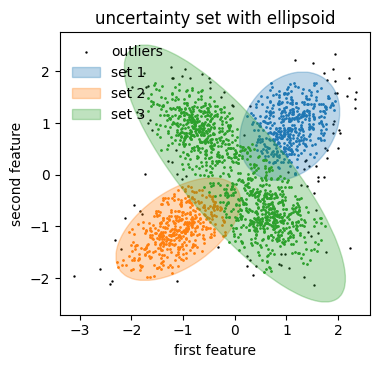

In [9]:
dgp.if_box = False
dgp.plot_set(savefig = False)

In [ ]:
a[0]